In [13]:
import pandas as pd 
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import os
from dotenv import load_dotenv

In [2]:
# set file path
#link to data https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-people/p09ar.xlsx
#Credit to Buaeruo of Census and Labor Data
filepath=Path('p09ar.csv')
#read in csv to pandas csv data reader,drop nan's , reset index to prep for standardized index format
data=pd.read_csv(filepath).dropna().reset_index()
#drop unwanted data series
data=data.drop(columns=['Unnamed: 2','Unnamed: 5','index'])
#rename data series column names
data.columns=['year','male_pop','male_mean','female_pop','female_mean']
#set index to remove duplicated 
data=data.set_index(['year'])
#drop duplicated columns
data=data.drop(['2017','2013 (38)'])
#reset index to prep cod standardized index format
data=data.reset_index()
#format values in column as dtype=(int)
data['male_pop'] = data['male_pop'].str.replace(',', '').astype(int)
#format values in column as dtype=(int)
data['male_mean'] = data['male_mean'].str.replace(',', '').astype(int)
#format values in column as dtype=(int)
data['female_pop'] = data['female_pop'].str.replace(',', '').astype(int)
#format values in column as dtype=(int)
data['female_mean'] = data['female_mean'].str.replace(',','').astype(int)
#Create values to show sum of population
data['pop_total']=(data['female_pop'])+(data['male_pop'])
#just for fun we did the gender specific to test if they mattered
data['male_total']=(data['male_pop'])*(data['male_mean'])
#just for fun we did the gender specific to test if they mattered
data['female_total']=(data['female_pop'])*(data['female_mean'])
#show consolidated population and income to express the avg income 
data['avg_income']=((data['female_total'])+(data['male_total']))/(data['pop_total'])
#take only columns needed for visual representation
data=data[['year','pop_total','avg_income']]
#setup standardized base index for all data sets , Kinda cheating but it works'
cleanindex=pd.date_range(start='12/31/1967', periods=53, freq='12M')
#setup standardized base index for all data sets 
cleanindex=cleanindex.sort_values(ascending=False)






#   ***Important***
#setup standardized base index for ****15-24*** 
clean1index=pd.date_range(start='12/31/1974', periods=46, freq='12M')
#setup standardized base index for all data sets
clean1index=clean1index.sort_values(ascending=False)


#start slicing different data sets from within main dataset



#   ***15+***
fifteen_onward=data[0:53].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(fifteen_onward)

#   ***15-24***
fifteen_to_twentyfour=data[53:99].set_index(clean1index).drop(columns='year').sort_index(ascending=True)
#print(fifteen_to_twentyfour)

#   ***25-34***
twentyfive_to_thirtyfour=data[99:152].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(twentyfive_to_thirtyfour)

#   ***35-44***
thirtyfive_to_fortyfour=data[152:205].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(thirtyfive_to_fortyfour)

#   ***45-54***
fourtyfive_to_fiftyfour=data[205:258].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(fourtyfive_to_fiftyfour)

#   ***55-64***
fiftyfive_to_sixtyfour=data[258:311].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(fiftyfive_to_sixtyfour)

#   ***65+***
sixtyfive_to_older=data[311:364].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(sixtyfive_to_seventyfour)


In [80]:
fiveplus=(fifteen_onward['pop_total'].pct_change()+1).cumprod()
fiveplusone=fifteen_onward['pop_total'].pct_change()

In [145]:
higestearnersplot=pd.DataFrame()
popchange=pd.DataFrame()
higestearnersplot['25-34']=twentyfive_to_thirtyfour['avg_income']
popchange['25-34pop change']=(twentyfive_to_thirtyfour['pop_total'].pct_change()+1).cumprod()
higestearnersplot['35-44']=thirtyfive_to_fortyfour['avg_income']
popchange['35-44pop change']=(thirtyfive_to_fortyfour['pop_total'].pct_change()+1).cumprod()
higestearnersplot['45-54']=fourtyfive_to_fiftyfour['avg_income']
popchange['45-54pop change']=(fourtyfive_to_fiftyfour['pop_total'].pct_change()+1).cumprod()
higestearnersplot['55-64']=fiftyfive_to_sixtyfour['avg_income']
popchange['55-64pop change']=(fiftyfive_to_sixtyfour['pop_total'].pct_change()+1).cumprod()
higestearnersplot['65+']=sixtyfive_to_older['avg_income']
popchange['65+ pop change']=(sixtyfive_to_older['pop_total'].pct_change()+1).cumprod()
higestearnersplot['15-24']=fifteen_to_twentyfour['avg_income']
popchange['15-24pop change']=(fifteen_to_twentyfour['pop_total'].pct_change()+1).cumprod()




def age_income():
    plot1=higestearnersplot.hvplot.line(line_width=4
                            , title='Average Income per Year'
                            , grid=True
                            , xlabel='Year'
                            , group_label='Age Groups')
   
    return plot1
age_income()


AttributeError: 'NdOverlay' object has no attribute 'saavefig'

<AxesSubplot:title={'center':'Percent of Total Earned Income'}, ylabel='None'>

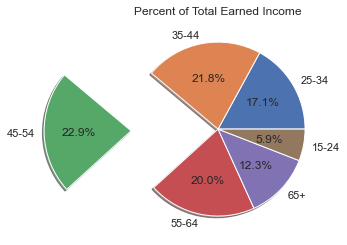

In [136]:
base=higestearnersplot.sum().sum()
percents=(higestearnersplot.sum()/base)*100
def age_income2():
    plot2=percents.plot.pie(y='Age Groups'
                            , title='Percent of Total Earned Income'
                            , autopct='%1.1f%%'
                            , explode=(0,0,1,0,0,0)
                            , shadow=True)
    return plot2
age_income2()

In [5]:
#importing libararies to scrape tables from websites
#  ***MUST RENAME FILE to "spdata.csv" AND CHANGE IN FILEPATH BELOW***
import tablescraper as ts
ts.main('https://www.multpl.com/inflation-adjusted-s-p-500/table/by-year')

[+] Found a total of 1 tables.
[+] Saving table-1


In [137]:
#Change File path to file name change
filepath=Path('spdata.csv')
# read in file in to csv pandas
spdata=pd.read_csv(filepath,infer_datetime_format=True)
#Bring in the base index 
cleanindex=pd.date_range(start='12/31/1966', periods=54, freq='12M')
#sort index value to standardized format 
cleanindex=cleanindex.sort_values(ascending=False)
#drop unwanted columns
spdata=spdata.drop(columns='Unnamed: 0')
#splice data for specific dates needed
spdata=spdata[2:56].drop(columns='Date').set_index(cleanindex)
#rename column names
spdata.columns=['SP_Close']
#format column values dtypes=float
spdata['SP_Close']=spdata['SP_Close'].str.replace(',', '').astype(float)
#sort pct change index values
spdata1=spdata.sort_index(ascending=True)
#merge pct change column into the original dataframe
spdata['SP_Pct_Change']=spdata1.pct_change()
#Gotta make sure that index is sorted
spdata=spdata.sort_index(ascending=True)
#add cumulative sum of pct_change column to origianl dataframe
spdata['SP_CumSum']=(spdata['SP_Pct_Change']+1).cumprod()-1
#gotta resort again and drop any unnesscesary values
spfinal=spdata.sort_index(ascending=True).dropna().drop(columns='SP_Close')
#display that data dog
spfinal.hvplot(line_width=4
                            , title='S&P DATA'
                            , grid=True
                            , xlabel='Year'
                            , group_label='Legend'
                            
                            , ylabel='Standardized Percent')

:NdOverlay   [Legend]
   :Curve   [index]   (value)

In [7]:
import tablescraper as ts
ts.main('https://www.multpl.com/us-real-gdp-growth-rate/table/by-year')
from pathlib import Path
import pandas as pd

[+] Found a total of 1 tables.
[+] Saving table-1


In [77]:
#set filepath name to input name
filepath=Path('gdpdata.csv')
#read in csv file to pandas
gdpdata=pd.read_csv(filepath,infer_datetime_format=True)
#Bring in the base index 
cleanindex=pd.date_range(start='12/31/1967', periods=53, freq='12M')
#set up index for base formating sort type
cleanindex=cleanindex.sort_values(ascending=False)
#sloppy attempt at showing of data ninja skills
#drop unused column data
gdpdata=gdpdata.drop(columns='Unnamed: 0')
#set base index 
gdpdata=gdpdata[1:54].drop(columns='Date').set_index(cleanindex)
#rename columns
gdpdata.columns=['Real_GDP_Growth_Rate']
#format values 
gdpdata['Real_GDP_Growth_Rate']=gdpdata['Real_GDP_Growth_Rate'].str.replace('%', '').astype(float)*.01
#sort index 
gdpdata=gdpdata.sort_index(ascending=True)
#add column of cumulate sum of percent change
gdpdata['Real_GDP_Cum_Sum']=((gdpdata['Real_GDP_Growth_Rate'])+1).cumprod()-1
#set final variable name
finalgdp=pd.concat([gdpdata,popchange['45-54pop change']],join='outer',axis='columns')
def gdpspcumsum():
    endingtail=pd.concat([finalgdp,spfinal,fiveplus],join='outer',axis='columns').drop(columns=['Real_GDP_Growth_Rate','SP_Pct_Change'])
    tail=endingtail.hvplot()
    return tail
gdpspcumsum()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:>

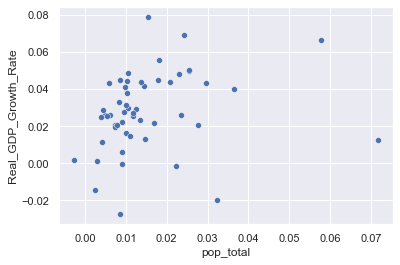

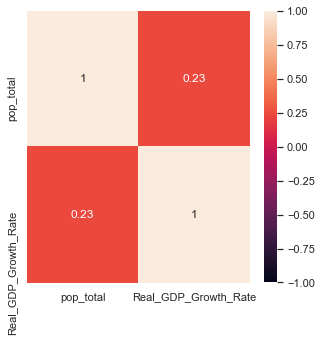

In [139]:
taylorgraph=pd.concat([fiveplusone,gdpdata['Real_GDP_Growth_Rate']],join='outer',axis='columns').dropna().reset_index()

taylor=taylorgraph.set_index('year')
sns.scatterplot(data=taylor,x='pop_total',y='Real_GDP_Growth_Rate',palette='deep')
correlation=taylor.corr()
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True)

In [9]:
from pathlib import Path
import pandas as pd

filepath=Path('world_data_final.csv')
worlddata=pd.read_csv(filepath)
worlddata=worlddata[:26]
worlddata=worlddata.drop(columns=['Country Name','Country Code','Series Code']).swapaxes(axis1='columns',axis2='rows',copy=True)
worlddata.columns=worlddata.iloc[0]
worlddata = worlddata.iloc[1:]
cleanindex=pd.date_range(start='12/31/1967', periods=53, freq='12M')
cleanindex=cleanindex.sort_values(ascending=True)
worlddata=worlddata.set_index(cleanindex)
worlddata=worlddata.fillna(0).astype('float64')



In [41]:
#                               ***Segregate Data***
#   ****POPULATION TOTALS****
#       ***Percent change cumulative sums***
# create df to hold values
population_total=pd.DataFrame()
# format specific column into INT format
population_total['U.S Pop Totals']=worlddata['Population, total'].astype(int)/100000000-2
# adding in the cumulative sum of percent change into the dataframe
population_total['Pop Cum Sum Pct']=(population_total.pct_change()+1).cumprod()
#population pct change
population_total['pop_pct_change']=worlddata['Population, total'].astype(int).pct_change()*(100)-1
# check that data son

def popchangetotal():
    population_total.index.set_names('year',inplace=True)
    pop=population_total.hvplot.area(x='year',y=['U.S Pop Totals','pop_pct_change'],stacked=False, alpha=0.4)
    return pop

popchangetotal()


# population_total.hvplot.area(x='Year', y=['Robbery', 'Aggravated assault'])

:NdOverlay   [Variable]
   :Area   [year]   (value)

In [76]:
#   ****Employment to Population Ratio TOTALS****
#       ***MALE/FEMALE Seperated Values***
# create df to hold values
emp_to_pop_ratio=pd.DataFrame()
# format 15+ ratio into a rounded formate format and stack in dataframe
emp_to_pop_ratio['Emp to pop ratio']=worlddata['Employment to population ratio, 15+, total (%) (national estimate)'].round(1)
# format population ratio MALE BASED into a rounded formate format and stack in dataframe
emp_to_pop_ratio['Emp to pop ratio, MALE']=worlddata['Employment to population ratio, 15+, male (%) (national estimate)'].round(1)
# format population ratio FEMALE BASED into a rounded formate format and stack in dataframe
emp_to_pop_ratio['Emp to pop ratio, FEMALE']=worlddata['Employment to population ratio, 15+, female (%) (national estimate)'].round(1)
# check that data son
def emptopopplot():
    emp_to_pop_ratio.index.set_names('year',inplace=True)
    t2t=emp_to_pop_ratio.hvplot.area(x='year',y=['Emp to pop ratio','Emp to pop ratio, MALE','Emp to pop ratio, FEMALE'],   stacked=False, legend='bottom_right',alpha=0.4,ylim=(20,90),dynamic=True)
    return t2t
emptopopplot()

:NdOverlay   [Variable]
   :Area   [year]   (value)

<AxesSubplot:>

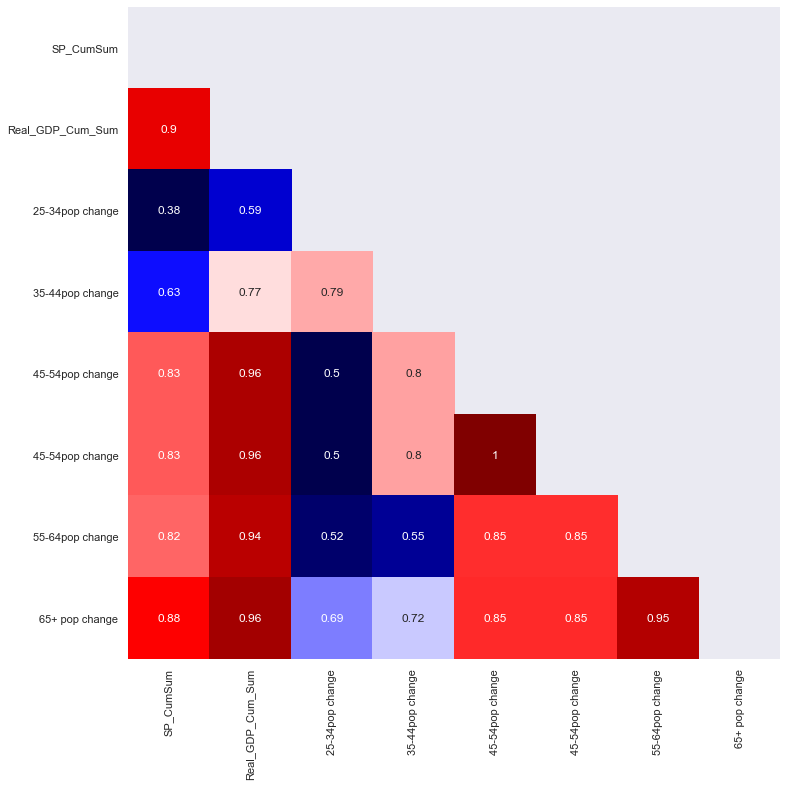

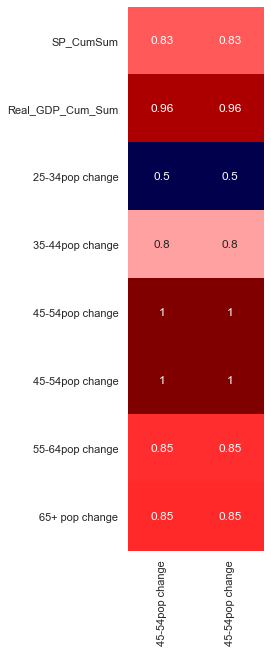

In [78]:
totalpopdata=pd.concat([popchange,higestearnersplot,spfinal,finalgdp],join='outer',axis='columns')
definedpop=totalpopdata[['SP_CumSum','Real_GDP_Cum_Sum','25-34pop change','35-44pop change','45-54pop change','55-64pop change','65+ pop change']]

def gdpcorr():
    gdpcor=definedpop.corr()
    
    matrix=np.triu(gdpcor)
    sns.set_theme(style='darkgrid')
    fig, ax = plt.subplots(figsize=(20, 12))
    plot3=sns.heatmap(gdpcor,
                    vmin=.5
                    , vmax=1
                    ,annot=True
                    ,cmap='seismic'
                    ,cbar=False
                    ,square=True
                    ,mask=matrix)
    return plot3
gdpcorr()


def gdpyearlycorr():
    gdpcor=definedpop.corr()
    
    sns.set_theme(style='darkgrid')
    fig, ax = plt.subplots(figsize=(10,10))
    plot3=sns.heatmap(gdpcor[['45-54pop change']]
                ,vmin=.5
                , vmax=1
                ,annot=True
                ,cbar=False
                ,square=True
                ,cmap='seismic')
    return plot3
gdpyearlycorr()



In [34]:
def scatter():
    definedpop.index.set_names('year',inplace=True)
    scat=definedpop.hvplot(x='Real_GDP_Cum_Sum',y=['25-34pop change','35-44pop change','45-54pop change','55-64pop change','65+ pop change'],by='year',kind='scatter',alpha=1,dynamic=False)
    return scat
scatter()

:NdOverlay   [Variable]
   :Scatter   [Real_GDP_Cum_Sum]   (value)

Launching server at http://localhost:56277


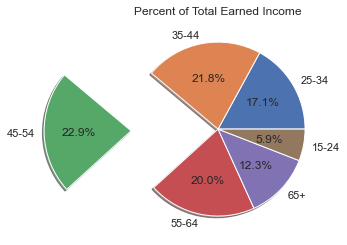

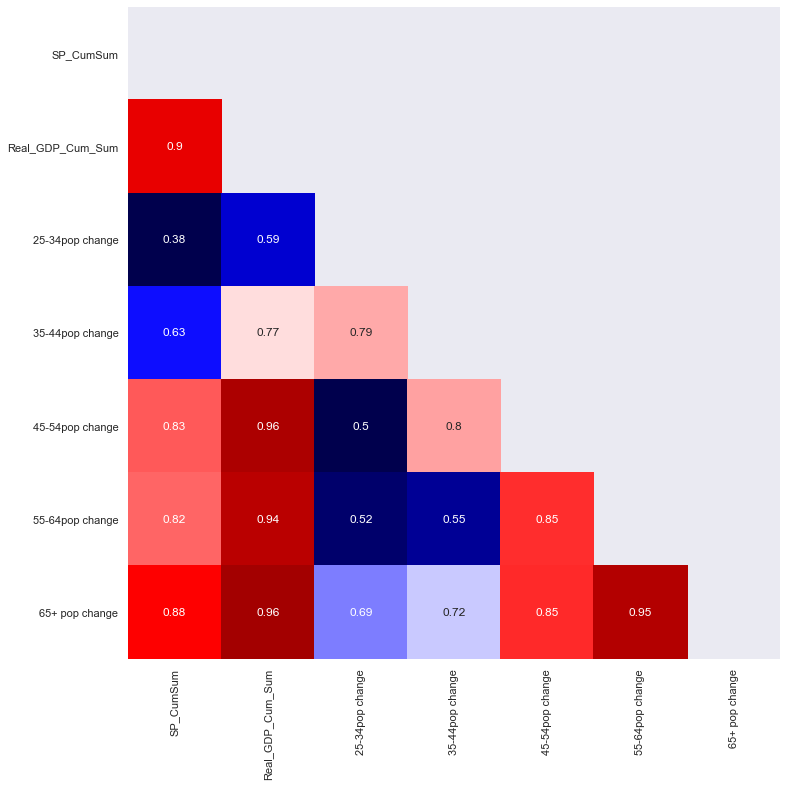

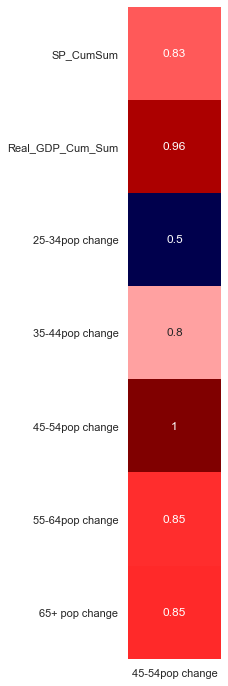

In [71]:
agedemo=pn.Column(
    "## AGE DEMOGRAPHIC",
    age_income(),
    age_income2(),
    popchangetotal(),
    )
gdpdata=pn.Column(
    "## GDP ANALYSIS",
    gdpcorr(),
    gdpyearlycorr(),
    scatter(),
    )
analysis=pn.Column(
    "##infoinfoinfo",
    gdpspcumsum(),
)
pablofacts=pn.Column(
    "## Facts to show Pablo creative perspective",
    emptopopplot(),
   )

# Create the dashboard
dashboardthings=pn.Tabs(
     ('Welcome',agedemo)
    ,('Yearly Market Analysis',gdpdata)
    ,('Neighborhood Analytics',analysis)
    ,('Parellel Plot Analysis',pablofacts)
)
dashboardthings.show()